## 📘 1. Introdução
--------------------------------------------------------------
As LSTMs são uma variação de RNNs que resolvem o problema do
desvanecimento/explosão do gradiente ao treinar sequências longas.
Elas utilizam "portas" para controlar o fluxo de informações.

LSTMs são eficazes para:
- Previsão de séries temporais
- Tradução automática
- Geração de texto
- Reconhecimento de fala

## 📘 2. Estrutura de uma célula LSTM
--------------------------------------------------------------
Uma célula LSTM possui três portas principais:
- Porta de entrada: decide quais informações adicionar à memória
- Porta de esquecimento: decide o que deve ser descartado
- Porta de saída: decide o que será enviado para a próxima célula

Essa estrutura permite que a LSTM mantenha informações por longos
períodos, superando limitações das RNNs simples.

## 📘 3. Exemplo prático: Prever sequência de números
- Usaremos a mesma ideia do exemplo anterior (0, 1, 2, ...)

- Treinaremos uma rede com LSTM

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Input
import matplotlib.pyplot as plt

# Criando sequência simples de números
dados = np.arange(100)

# Função para criar pares de sequência
def criar_sequencia(dados, passo):
    X, y = [], []
    for i in range(len(dados) - passo):
        X.append(dados[i:i+passo])
        y.append(dados[i+passo])
    return np.array(X), np.array(y)

passo = 5
X, y = criar_sequencia(dados, passo)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Normalização
X = X / np.max(dados)
y = y / np.max(dados)

# Divisão em treino/teste
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

### 📘 4. Construção do modelo LSTM

In [2]:
model = Sequential()
model.add(Input(shape=(passo, 1)))
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

### 📘 5. Treinamento e Avaliação

In [3]:
history = model.fit(X_train, y_train, epochs=200, verbose=0)
loss = model.evaluate(X_test, y_test)
print(f"Loss no teste: {loss:.6f}")

# Predição
y_pred = model.predict(X_test)

# Desnormalizando resultados
y_pred_rescaled = y_pred * np.max(dados)
y_test_rescaled = y_test * np.max(dados)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - loss: 5.6296e-05
Loss no teste: 0.000056
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


### 📘 6. Visualização

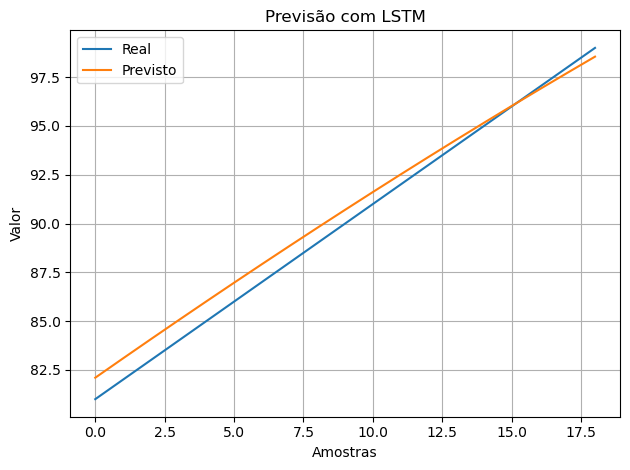

In [4]:
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_rescaled, label='Previsto')
plt.title("Previsão com LSTM")
plt.xlabel("Amostras")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📘 7. Conclusão
--------------------------------------------------------------
- LSTMs são eficazes para capturar padrões em sequências longas.
- Neste exemplo simples, observamos boa previsão mesmo com poucos neurônios.
- LSTM é base para arquiteturas mais avançadas como GRU, BiLSTM e Transformers.

Em problemas reais, é comum:
- Usar mais neurônios e camadas empilhadas
- Trabalhar com textos, séries temporais multivariadas, etc.

Fim do conceito LSTM.